In [1]:
 import tensorflow as tf

2024-07-12 14:41:46.673175: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
w = tf.constant(1.)

2024-07-12 14:41:47.402477: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-07-12 14:41:47.403130: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-07-12 14:41:47.453963: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-12 14:41:47.454061: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4060 Ti computeCapability: 8.9
coreClock: 2.535GHz coreCount: 34 deviceMemorySize: 7.75GiB deviceMemoryBandwidth: 268.25GiB/s
2024-07-12 14:41:47.454075: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-07-12 14:41:47.455264: I tensorflow/stream_executor/platform

In [3]:
x = tf.constant(2.)

In [4]:
# persistent=True释放资源
with tf.GradientTape(persistent=True) as tape:
    tape.watch([w])
    y2 = x*w

## 二阶求导

In [5]:
w = tf.Variable(1.0)
b = tf.Variable(2.0)
x = tf.Variable(3.0)

In [6]:
with tf.GradientTape() as t1:
    with tf.GradientTape() as t2:
        y = x*w+b
    dy_dw, dy_db = t2.gradient(y, [w,b])
d2y_dw2 = t1.gradient(dy_dw, w) 

In [7]:
print(dy_dw)
print(dy_db)
print(d2y_dw2)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
None


In [8]:
a = tf.linspace(-10, 10, 10)
with tf.GradientTape() as tape:
    tape.watch(a)
    y = tf.sigmoid(a)
grads = tape.gradient(y, [a])

In [9]:
a

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,   5.55555556,
         7.77777778,  10.        ])>

In [10]:
y

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([4.53978687e-05, 4.18766684e-04, 3.85103236e-03, 3.44451957e-02,
       2.47663801e-01, 7.52336199e-01, 9.65554804e-01, 9.96148968e-01,
       9.99581233e-01, 9.99954602e-01])>

In [11]:
grads

[<tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([4.53958077e-05, 4.18591319e-04, 3.83620191e-03, 3.32587242e-02,
        1.86326443e-01, 1.86326443e-01, 3.32587242e-02, 3.83620191e-03,
        4.18591319e-04, 4.53958077e-05])>]

tanh

In [12]:
a = tf.linspace(-5., 5. ,10 )

In [13]:
# tf.tanh(a)

In [14]:
a = tf.linspace(-1, 1, 10)
tf.nn.relu(a)

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.        ])>

In [15]:
tf.nn.leaky_relu(a)

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([-0.2       , -0.15555556, -0.11111111, -0.06666667, -0.02222222,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])>

## MSE Gradient

In [16]:
x = tf.random.normal([2, 4])
w = tf.random.normal([4, 3])
b = tf.zeros([3])
y = tf.constant([2, 0])

In [17]:
with tf.GradientTape() as tape:
    tape.watch([w, b])
    prob = tf.nn.softmax(x@w+b, axis=1)
    loss = tf.reduce_mean(tf.losses.MSE(tf.one_hot(y, depth=3), prob))

2024-07-12 14:41:48.584988: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


In [18]:
grads = tape.gradient(loss, [w, b])
grads[0]

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-0.04359954,  0.14374043, -0.10014088],
       [-0.00535568,  0.04913037, -0.04377469],
       [ 0.01093596, -0.05561225,  0.04467628],
       [ 0.06954584, -0.00934984, -0.060196  ]], dtype=float32)>

In [19]:
grads[1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.04172349,  0.12888527, -0.08716177], dtype=float32)>

# softmax()

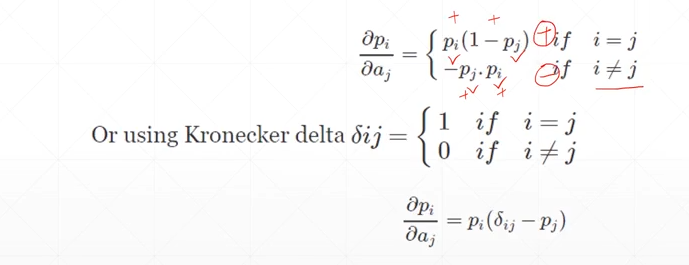

In [20]:
x = tf.random.normal([2, 4])
w = tf.random.normal([4, 3])
b = tf.zeros([3])
y = tf.constant([2, 0])

这段代码是使用 TensorFlow 中的自动微分功能来计算给定神经网络模型的损失函数关于权重 w 和偏置 b 的梯度。 

在这段代码中：
- `tf.GradientTape()` 创建了一个上下文管理器，用于跟踪计算梯度的过程。
- `tape.watch([w, b])` 指定了需要 tape 记录梯度信息的变量，这里是权重 w 和偏置 b。
- `logits = x @ w + b` 计算了模型的原始输出。
- `tf.losses.categorical_crossentropy(tf.one_hot(y, depth=3), logits, from_logits=True)` 计算了多类别交叉熵损失。
- `tf.reduce_mean()` 用于计算平均损失值，即对每个样本的损失进行平均。
- 最终，`loss` 变量保存了模型的损失值。

请注意，这段代码中没有给出梯度的计算过程，通常在此段代码之后会调用 `tape.gradient(loss, [w, b])` 来计算损失函数关于权重 w 和偏置 b 的梯度。


这段代码是使用 TensorFlow 深度学习框架计算多分类任务中的交叉熵损失函数。让我解释一下每个部分的作用：

1. `tf.one_hot(y, depth=3)`：这里通过对标签 `y` 进行 one-hot 编码，将其转换为一个深度为 3 的独热编码张量。其中 `depth=3` 表示类别的个数为3，即多分类任务的类别数为3。

2. `logits`：表示模型的原始预测输出，这些输出通常是未经归一化的分数，而不是概率。在这里，假设 `logits` 是网络的输出。

3. `tf.losses.categorical_crossentropy`：这是 TensorFlow 中用于计算分类交叉熵损失的函数。它接受模型的预测 logits 和实际的 one-hot 编码标签作为输入，并返回对应的损失值。

4. `tf.reduce_mean`：这是 TensorFlow 中用于计算张量平均值的函数。在这里，它将所有样本的损失值加总并求平均，得到最终的平均损失。

因此，整个代码段的作用是计算模型预测与真实标签之间的交叉熵损失，并且对所有样本的损失值取平均作为最终的损失值。这有助于衡量模型在多分类任务中的性能表现。


In [21]:
with tf.GradientTape() as tape:
    tape.watch([w, b])
    logits = x@w + b
    loss = tf.reduce_mean(tf.losses.categorical_crossentropy(tf.one_hot(y, depth=3),logits,from_logits=True))

In [22]:
grads = tape.gradient(loss, [w, b])

In [23]:
grads[0]

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 0.25285846, -0.02473261, -0.22812584],
       [-0.05070542, -0.02250414,  0.07320956],
       [ 0.48897594, -0.04611428, -0.44286165],
       [ 0.1297169 ,  0.05504914, -0.18476605]], dtype=float32)>

In [24]:
grads[1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.21312693,  0.05826452,  0.1548624 ], dtype=float32)>

# 单层出感知机及其梯度

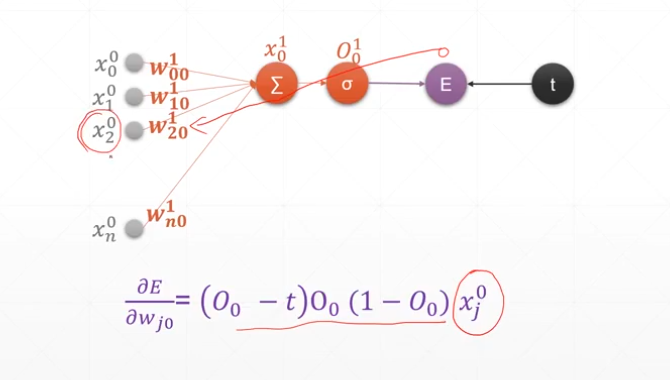

In [25]:
x = tf.random.normal([1, 3])
w = tf.ones([3, 1])
b = tf.ones([1])
y = tf.constant([1])

这行代码是用 TensorFlow 深度学习框架中的函数来计算均方误差（Mean Squared Error，MSE）损失函数。让我们逐步解释这行代码：

1. `tf.losses.MSE(y, logits)`: 这个部分是使用 TensorFlow 框架中的 `tf.losses` 模块中的 Mean Squared Error（均方误差）函数来计算预测值`logits`和真实标签值`y`之间的均方误差。在深度学习任务中，通常使用均方误差作为损失函数来度量模型的预测和真实值之间的差距。

2. `tf.reduce_mean()`: 这个部分是 TensorFlow 中的一个函数，用于计算张量（tensor）中所有元素的平均值。在这里，它被用于计算均方误差的平均值，以获得整体的损失值。

因此，整行代码的作用是计算预测值`logits`和真实标签值`y`之间的均方误差，并将这个均方误差的平均值存储在变量`loss`中。这个`loss`变量通常用于反向传播算法中的优化过程，以帮助模型调整参数以最小化损失函数。


In [26]:
with tf.GradientTape() as tape:
    tape.watch([w, b])
    logits = tf.sigmoid(x@w+b)
    loss = tf.reduce_mean(tf.losses.MSE(y, logits))

In [27]:
grads = tape.gradient(loss, [w,b])

In [28]:
grads[0]

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.04214418],
       [0.23685095],
       [0.27313548]], dtype=float32)>

In [29]:
grads[1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.18307741], dtype=float32)>

# 多输出感知机及其梯度

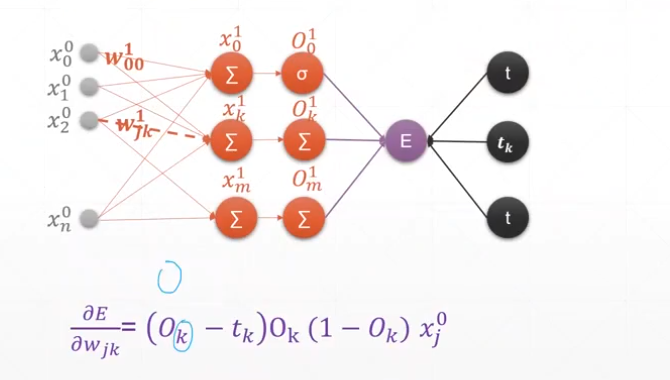

In [30]:
x = tf.random.normal([2, 4])
w = tf.random.normal([4, 3])
b = tf.zeros([3])
y = tf.constant([2 ,0])

In [31]:
x

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.4515325 ,  1.1569462 ,  2.084073  , -0.06359135],
       [-2.1115532 ,  0.77245915,  0.4092564 , -0.9147934 ]],
      dtype=float32)>

In [32]:
with tf.GradientTape() as tape:
    tape.watch([w, b])
    prob = tf.nn.softmax(x@w+b, axis=1)
    loss = tf.reduce_mean(tf.losses.MSE(tf.one_hot(y, depth=3), prob))

In [33]:
grads = tape.gradient(loss, [w, b])
grads[0]

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 0.13140658,  0.00202591, -0.13343246],
       [-0.04752902,  0.00076589,  0.04676313],
       [-0.02437619,  0.00264118,  0.02173501],
       [ 0.05700185,  0.00107831, -0.05808016]], dtype=float32)>

In [34]:
grads[1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.06180192,  0.00023516,  0.06156675], dtype=float32)>

# 链式法则

In [35]:
x = tf.constant(1.) 
w1 = tf.constant(2.)
b1 = tf.constant(1.)
w2 = tf.constant(2.)
b2 = tf.constant(1.)

In [36]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch([w1, b1, w2, b2])
    
    y1 = x * w1 + b1
    y2 = y1*w2+b2

In [37]:
dy2_dy1 = tape.gradient(y2, [y1])[0]
dy2_dy1

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [38]:
dy1_dw1 = tape.gradient(y1, [w1])[0]
dy1_dw1

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [39]:
dy2_dw1 = dy2_dy1 * dy1_dw1
dy2_dw1

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [40]:
dy2_dw1 = tape.gradient(y2, [w1])[0]
dy2_dw1

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

# 多层感知机梯度

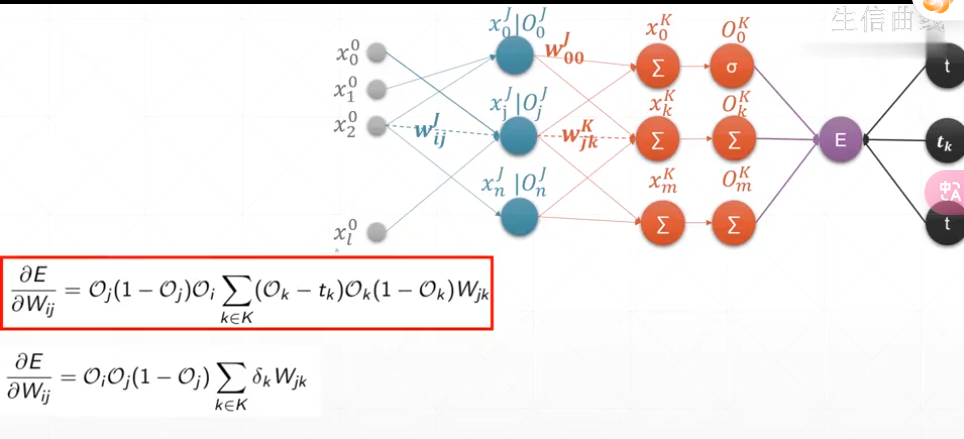

## Himmelnlau函数优化

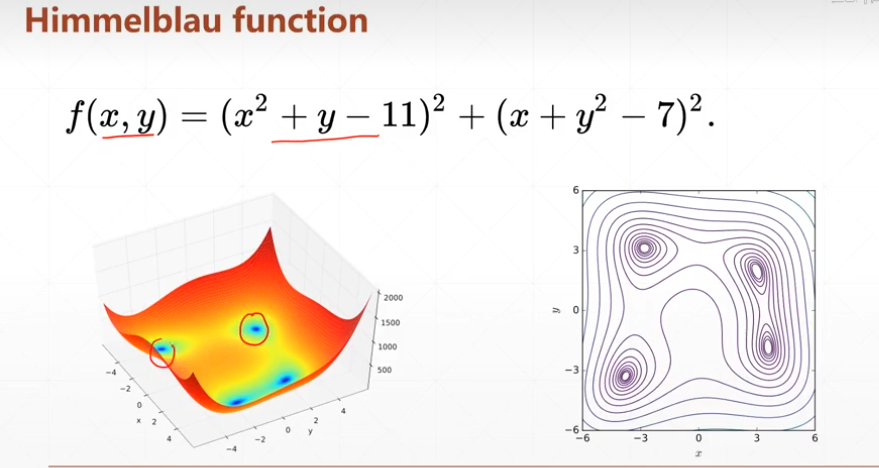

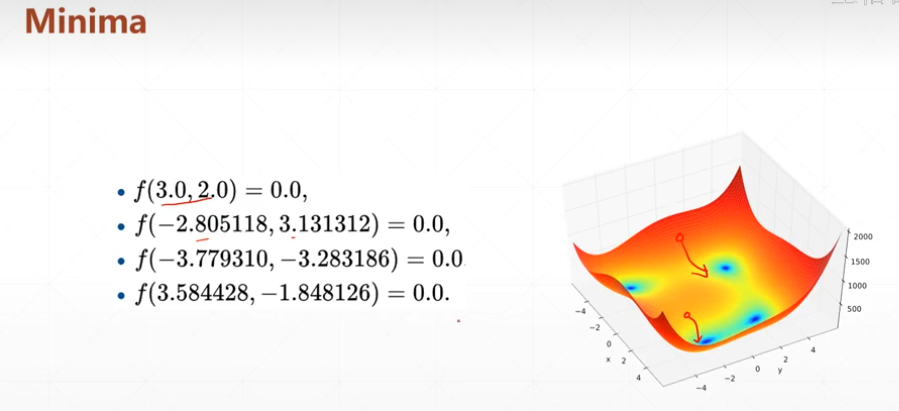

In [41]:
import numpy as np
from  matplotlib import pyplot as plt

In [42]:
def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

In [43]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x, y range:', x.shape, y.shape)

x, y range: (120,) (120,)


In [44]:
# 并行生成一系列点
x, y = np.meshgrid(x, y)

In [45]:
print('x,y maps:', x.shape, y.shape)

x,y maps: (120, 120) (120, 120)


In [46]:
z = himmelblau([x, y])

AttributeError: 'Axes3D' object has no attribute 'view_int'

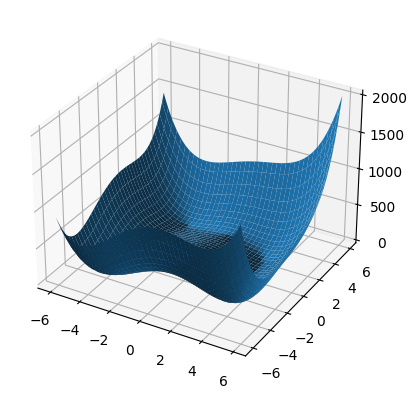

In [47]:
fig = plt.figure('himmelblau')
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(x, y, z)
ax.view_int(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [48]:
x = tf.constant([-4., 0.])

若是Dense类型则不需要watch，tensor类型需要watch

In [49]:
for step in range(200):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)
    
    grads = tape.gradient(y, [x])[0]
    x -= 0.01*grads

# 手写数字问题（层）-实战

In [122]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers,Sequential, metrics

在TensorFlow中，tf.cast和tf.convert_to_tensor是两个不同的函数，它们具有不同的功能和用途。

1. tf.cast：tf.cast用于执行张量数据类型的转换，即将一个张量转换为指定的数据类型。例如，将一个浮点数张量转换为整数张量。tf.cast函数不会改变张量的值，但会改变它的数据类型。这个函数可以在训练过程中用于类型转换的需求。

示例：
```python
import tensorflow as tf

# 定义一个浮点数张量
x = tf.constant([1.2, 2.8, 3.5])

# 将浮点数张量转换为整数张量
x_int = tf.cast(x, tf.int32)

print(x_int)
```

2. tf.convert_to_tensor：tf.convert_to_tensor用于将Python对象转换为张量。这个函数会尽可能地将Python对象转换为张量，并且会复制对象的值。如果给定的输入对象已经是一个张量，则不做任何改变，直接返回该张量。

示例：
```python
import tensorflow as tf

# 将Python列表转换为张量
x_list = [1, 2, 3]
x_tensor = tf.convert_to_tensor(x_list)

print(x_tensor)
```

总的来说，tf.cast用于数据类型的转换，而tf.convert_to_tensor用于将Python对象转换为张量。这两个函数在TensorFlow中都具有各自的作用，根据具体的需求选择合适的函数。


In [123]:
(x,y), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [124]:
x.dtype

dtype('uint8')

In [125]:
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    y = tf.cast(y, dtype=tf.int32)
    
    return x, y

In [126]:
print(x.shape, y.shape)

(60000, 28, 28) (60000,)


`tf.data.Dataset.from_tensor_slices` 是 TensorFlow 中用于创建 `tf.data.Dataset` 对象的函数之一。该函数接受一个包含张量的 Python 可迭代对象（如列表、数组等），并将每个张量作为单个元素添加到 Dataset 中。具体而言，该函数将输入张量沿着它们的第一个维度切片，然后将每个切片作为 Dataset 中的一个元素。
这意味着每个输入张量的第一个维度的大小应该相同，以便能够正确切片并形成 Dataset。


In [127]:
batchsize = 128
db = tf.data.Dataset.from_tensor_slices((x, y))
db = db.map(preprocess).shuffle(10000).batch(batchsize)

db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db.map(preprocess).batch(batchsize)

In [128]:
db_iter = iter(db)
sample = next(db_iter)
print('batch:',sample[0].shape, sample[1].shape)

batch: (128, 28, 28) (128,)


In [129]:
model = Sequential([
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dense(10)
])

In [130]:
model.build(input_shape=[None, 28*28])
# 打印网络格式
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [131]:
# 优化器
optimizer = optimizers.Adam(lr=1e-3)

`loss2 = tf.losses.categorical_crossentropy(tf.one_hot(y, depth=10), logits, from_logits=True)`
这行代码是用于计算分类任务中的交叉熵损失函数。让我逐步解释这行代码：

1. `tf.losses.categorical_crossentropy`: 这是 TensorFlow 中用于计算交叉熵损失的函数。交叉熵损失是一种常用的用于衡量模型输出概率分布与真实标签之间差异的指标。对于分类任务，交叉熵损失通常被用作损失函数来衡量模型输出与真实标签的差距。

2. `tf.one_hot(y, depth=10)`: 这里使用 `tf.one_hot` 函数将目标标签 `y` 转换为 one-hot 编码格式。`depth=10` 参数表示输出的 one-hot 编码的深度为 10，这里假设有 10 个类别。这样做是为了将目标标签转换为模型预测的概率分布格式，以便计算交叉熵损失。

3. `logits`: 这是模型的原始输出，通常是神经网络的最后一层的输出值，未经过 softmax 函数处理。在交叉熵损失计算中，需要将这些 logits 作为模型的预测值。

4. `from_logits=True`: 这个参数告诉函数 `logits` 是否已经经过 softmax 函数处理。如果 `from_logits=True`，则函数会在内部进行 softmax 处理，然后再计算交叉熵损失；如果 `from_logits=False`，则会假设 `logits` 已经是经过 softmax 处理的。

综上所述，这行代码的作用是计算模型的交叉熵损失，其中真实标签经过 one-hot 编码，模型的预测值为 logits，同时会根据参数 `from_logits` 来决定是否进行 softmax 处理。


`grads = tape.gradient(loss_ce, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))`

这两行代码涉及神经网络训练中的反向传播和优化器更新参数的过程。下面我会详细解释这两行代码的作用和流程：

1. `grads = tape.gradient(loss_ce, model.trainable_variables)`：
   - `tape.gradient(loss_ce, model.trainable_variables)`：这个方法计算损失函数 `loss_ce` 对于模型中所有可训练变量（`model.trainable_variables`）的梯度。这里使用了 TensorFlow 的自动微分功能，即利用 TensorFlow 的 GradientTape 对象 `tape` 来跟踪计算梯度的过程。
   - `grads`：将计算得到的梯度存储在 `grads` 变量中，这些梯度将会用来更新模型中的可训练参数。

2. `optimizer.apply_gradients(zip(grads, model.trainable_variables))`：
   - `zip(grads, model.trainable_variables)`：将梯度和对应的可训练参数打包成一个元组的列表。这里要求梯度列表和可训练参数列表的顺序要一一对应。
   - `optimizer.apply_gradients(...)`：使用优化器 `optimizer` 对模型的可训练参数进行更新。优化器使用梯度下降等优化算法来调整模型参数，以使损失函数最小化。

总的来说，这两行代码的作用是在模型训练过程中执行了一次参数更新的操作。首先计算损失函数对于模型参数的梯度，然后利用优化器根据这些梯度来更新模型参数，以使模型更适应训练数据，从而提高模型的性能。


In [147]:
def main():
    
    for epoch in range(30):
        
        for step, (x,y) in enumerate(db):
            x = tf.reshape(x, [-1, 28*28])

            with tf.GradientTape() as tape:
                logits = model(x)
                loss_mse = tf.reduce_mean(tf.losses.MSE(tf.one_hot(y, depth=10), logits))
                loss_ce = tf.losses.categorical_crossentropy(tf.one_hot(y, depth=10), logits, from_logits=True)
                loss_ce  = tf.reduce_mean(loss_ce)
                
            grads = tape.gradient(loss_ce, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            if step % 100 == 0:
                print(epoch, step, 'loss:',float(loss_ce), float(loss_mse))
                
        # test
        total_correct = 0
        total_num = 0
        for x,y in db_test:

            # x: [b, 28, 28] => [b, 784]
            # y: [b]
            x = tf.reshape(x, [-1, 28*28])
            # [b, 10]
            logits = model(x)
            # logits => prob, [b, 10]
            prob = tf.nn.softmax(logits, axis=1)
            # [b, 10] => [b], int64
            pred = tf.argmax(prob, axis=1)
            pred = tf.cast(pred, dtype=tf.int32)
            # pred:[b]
            # y: [b]
            # correct: [b], True: equal, False: not equal
            correct = tf.equal(pred, y)
            correct = tf.reduce_sum(tf.cast(correct, dtype=tf.int32))

            total_correct += int(correct)
            total_num += x.shape[0]

        acc = total_correct / total_num
        print(epoch, 'test acc:', acc)

In [148]:
if __name__ == '__main__':
    main()

0 0 loss: 0.14367394149303436 205.47564697265625
0 100 loss: 0.13719531893730164 210.75808715820312
0 200 loss: 0.07490015029907227 177.95651245117188
0 300 loss: 0.17779992520809174 175.18576049804688
0 400 loss: 0.06941689550876617 200.00595092773438
0 test acc: 0.887
1 0 loss: 0.20830978453159332 188.24691772460938
1 100 loss: 0.162850022315979 152.83041381835938
1 200 loss: 0.0762757658958435 219.3246307373047
1 300 loss: 0.11651694029569626 212.28041076660156
1 400 loss: 0.04022644832730293 279.5343933105469
1 test acc: 0.8841
2 0 loss: 0.14855581521987915 220.02719116210938
2 100 loss: 0.0927969217300415 256.4122009277344
2 200 loss: 0.1186324954032898 201.98976135253906
2 300 loss: 0.1331224888563156 200.2256317138672
2 400 loss: 0.08953274041414261 203.44802856445312
2 test acc: 0.8937
3 0 loss: 0.14535756409168243 273.6951904296875
3 100 loss: 0.07928603142499924 213.949951171875
3 200 loss: 0.1544206738471985 204.34242248535156
3 300 loss: 0.06575853377580643 219.640213012695

# 可视化